In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Biophysics is all about the creation and improvization of tools.
## My project served to find a situation where python could be used to create a tool for a system that included images.

### I thought that the tracking of 3-D spheres in motion and studying their kinematics to be a tedious goal of mine. 

#### In order to do this I had to gather what I've learned about python and determine what questions I could explore to use these skills and improve on them. 

## I Decided that the best approach would be to start a list of what I'd need for the task:

## 1) <font color='red'>GET A VIDEO AND UPLOAD IT.</font>
### I need to know how to take a video with my phone and get it onto my computer


## 2) <font color='red'>GET A FORMAT THAT I CAN USE AND NOT LOSE DATA.</font>
### Once I have the video on my computer I need to convert it into a form that wont compress the data whilst also being familiar (I decided to use ImageJ to convert my images to Tiff Stacks) 

## 3) <font color='red'>LEARN HOW TO INDEX AND THRESHOLD COLOR VIDEOS.</font>
### Due to the fact that we had never had worked with a video in lab I needed to figure out the indexing of a color video. (a rather simple task depending on how you go about it)

## 4) <font color='red'>THRESHOLDING ACROSS FRAMES.</font>
### I would need to be able to threshold my video in a way that I could differentiate between my Spheres. 
##### (This becomes the biggest problem in real videos and when two objects collide. )



## 5) <font color='red'> CREATE A LOOP FOR FRAME NUMBER, PUT A LOOP FOR COLOR IN THAT LOOP.</font>
### I now have position information (X,Y) , Time information( Frame Number), and Color/Object Information (Color sheets) 
#### Color information allows us to track a specific object while not worrying about collisions.


## 6) <font color='red'> USING REGIONPROPS WITH MY OBJECTS.</font>
### We have done this before, and I have had mild success with some of the features but the core functions of regionprops will help a ton with our kinematics.


# I started this project by creating a Powerpoint 
## I created a blue oval and added an animation known as "swivel".
## After creating a video and uploading it I started with this code.

In [3]:
# READ AN IMAGE STACK
from skimage import io
swivel = io.imread(r'C:\Users\trunk\Desktop\Project\Swivel.tiff')
print(swivel.shape)
print('This shows us that the order for each dimension is (frame #, x, y, color)')

(13, 1280, 720, 4)
This shows us that the order for each dimension is (frame #, x, y, color)


This is thus the 10th frame of our video. 


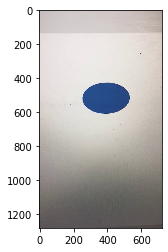

In [4]:
print('This is thus the 10th frame of our video. ')
plt.imshow(swivel[10,:,:,:])

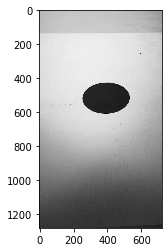

In [5]:
# CONVERT MY IMAGE TO RGB
from skimage.color import rgb2gray
Grey= rgb2gray(swivel)

plt.imshow(Grey[10,:,:,], cmap='gray')


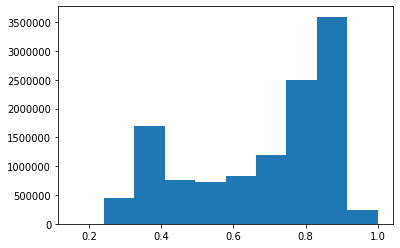

In [6]:
h=plt.hist(Grey.ravel())

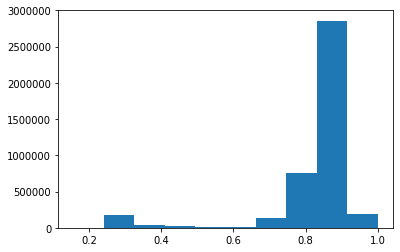

In [7]:
Gray = Grey[:13,200:650]
h=plt.hist(Gray.ravel())

# For the next part I needed code for three things.
## Fixing the quality of my video via gaussian filter
## Thresholding the object
## Processing across frames.


n = 0,  center = (318.48545142160395, 399.6518040237211),    area = 36086


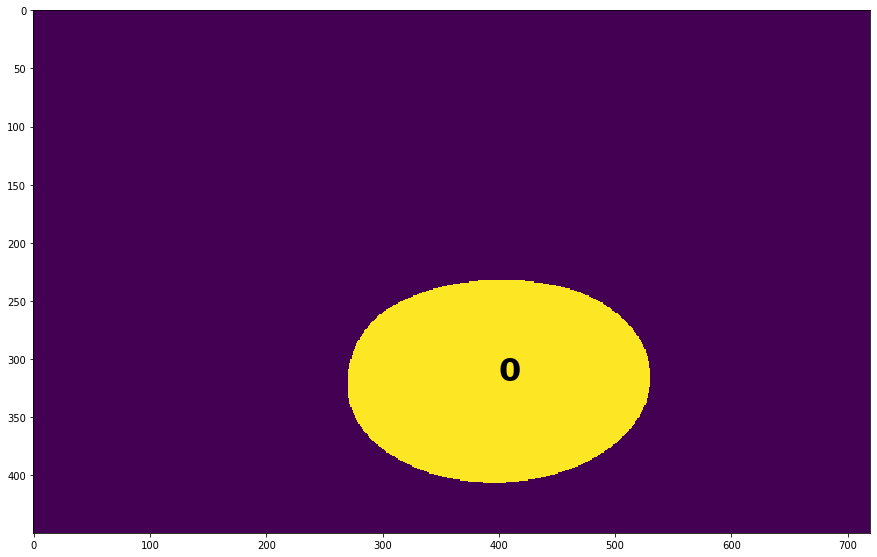

In [8]:
from skimage.filters import gaussian
from skimage.measure import regionprops, label

T=.65



for i in range(8,9):
    fig, ax = plt.subplots(figsize=(15, 10))
    GrayGauss = gaussian(Gray, 4)
    GrayGauss.shape

    Thresh = (GrayGauss < T).astype(np.int8)
   
 
    
    ax.imshow(Thresh[i])
    
 
    imlab, Nlab = label(Thresh[i], 8,0, True)
    
    
    
    props = regionprops(imlab)
    
    for n,p in enumerate(props):
        area = p.area
        y,x=p.centroid

        
        print('n = ' + str(n) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
        
        
        plt.text(x,y, str(n), color='k', fontsize='32', weight='bold')
    plt.show()  
            

# Phase 2: RGB MOVEMENT


In [9]:
Im = io.imread(r'C:\Users\trunk\Desktop\Project\RGB.tiff')

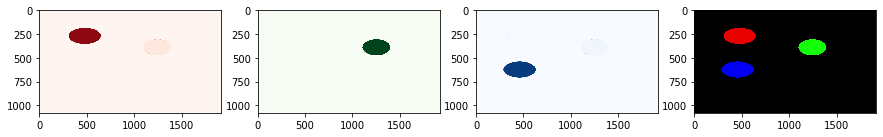

In [10]:
plt.rcParams['figure.figsize']=(15,15) # set the figure size
fig2 = plt.figure()
plt.subplot(141)
plt.imshow(Im[13,:,:,0], cmap='Reds')
plt.subplot(142)
plt.imshow(Im[13,:,:,1], cmap='Greens')
plt.subplot(143)
plt.imshow(Im[13,:,:,2], cmap='Blues')
plt.subplot(144)
plt.imshow(Im[13,:,:,:3])

53


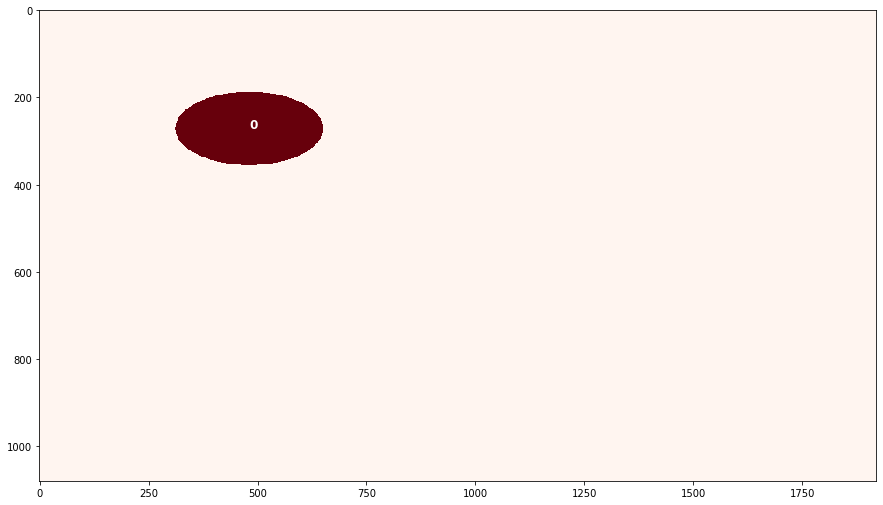

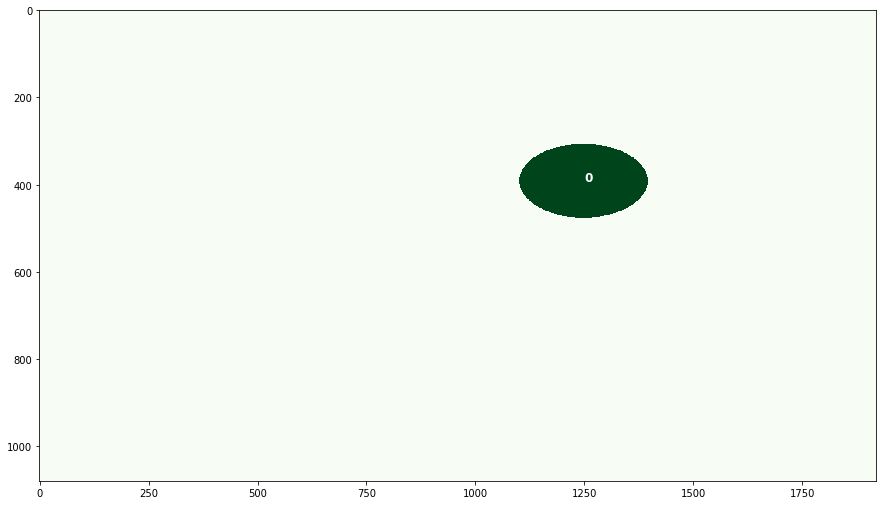

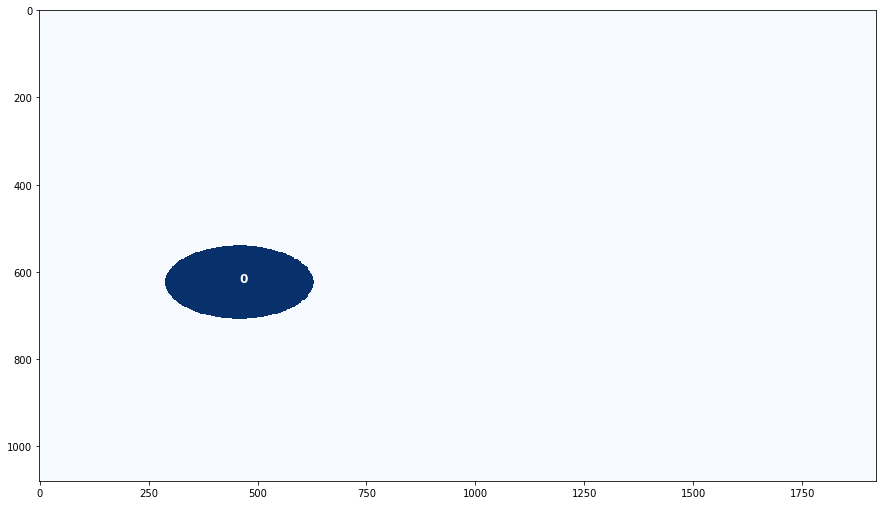

In [11]:
Im.shape
GT=185
RT=185
BT=130
L= len(Im[:])
print(L)

for i in range (0,3):
    
    if i==0:
        for n in range(19,20):
            fig, ax = plt.subplots(figsize=(15, 10))
            Red = Im[n,:,:,i]
            #print(Red.shape)
            #plt.imshow(Im[1,:,:,i], cmap='Greens')
            RThresh = (Red >RT).astype(np.int8)
            
        
            #ax.imshow(GThresh, cmap='Greens')
            imlab, Nlab = label(RThresh, 8,0, True)
            #print(imlab)
           
            #print(imlab.shape)
            props = regionprops(imlab)
            #print(props)
            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(RThresh, cmap='Reds')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='w', fontsize='12', weight='bold')
              
        
    elif i==1:
        for n in range(19,20):
            fig, ax = plt.subplots(figsize=(15, 10))
            Green = Im[n,:,:,i]
            #print(Red.shape)
            plt.imshow(Im[1,:,:,i], cmap='Greens')
            GThresh = (Green >BT).astype(np.int8)
            
        
            #ax.imshow(BThresh, cmap='Greens')
            imlab, Nlab = label(GThresh, 8,0, True)
            #print(imlab)
            #print(imlab.shape)
            props = regionprops(imlab)

            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(GThresh, cmap='Greens')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='w', fontsize='12', weight='bold')        

        
    else:
        for n in range(19,20):
     
            fig, ax = plt.subplots(figsize=(15, 10))
            Blue = Im[n,:,:,i]
        
            #print(Red.shape)
            plt.imshow(Im[1,:,:,i], cmap='Reds')
            BThresh = (Blue >RT).astype(np.int8)
            
        
            #ax.imshow(RThresh, cmap='Reds')
            imlab, Nlab = label(BThresh, 8,0, True)
            #print(imlab)
            #print(imlab.shape)
            props = regionprops(imlab)

            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(BThresh, cmap='Blues')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='w', fontsize='12', weight='bold') 
            

# Phase 3: Don't Reinvent The wheel. Applying code from random walk assignment for distance tracking.

#### Starting code:


In [ ]:
for k in range(0,nFrames):
        Dx[k] = x[k] - x[k-1] 
        Dy[k] = y[k] - y[k-1]
        
        Distance = math.sqrt((abs(Dx[k])**2) + (abs(Dy[k]))**2)
        distColor.append(Distance)
        #print(Distance)
        TotD = sum(distColor)  
        

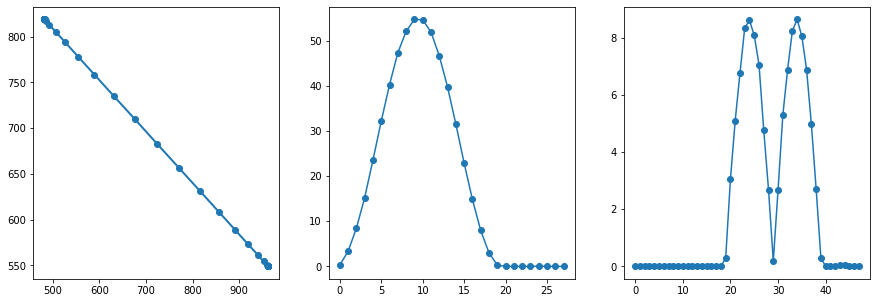

In [13]:
import math as math
#working with distance
Vel = []
Acc = []
nFrames = len(Im[:,1,1,1])
a = np.zeros(len(Im[1,:,:,1]))
b = np.zeros(len(Im[1,:,:,1]))
Dx = np.zeros(len(Im[1,:,:,1]))
Dy = np.zeros(len(Im[1,:,:,1]))
D2x = np.zeros(len(Im[1,:,:,1]))
D2y = np.zeros(len(Im[1,:,:,1]))
T = 184
for n in range(nFrames):

            Color = Im[n,10:,:,0]
           
            Thresh = (Color >T).astype(np.int8)
            
        
            
            imlab, Nlab = label(Thresh, 8,0, True)
            
            props = regionprops(imlab)
            
            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
            
                a[n] = x
                b[n] = len(Im[1,:,1,1])-y
                
                    
               # 1st derivative
                Dx[n] = a[n] - a[n-1] 
                Dy[n] = b[n] - b[n-1]
                
                # 2nd derivative
                D2x[n] = Dx[n] - Dx[n-1] 
                D2y[n] = Dy[n] - Dy[n-1]
        
                Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
            
                Vel.append(Velocity)
                Acc.append(Acceleration)
                
                
g = []
Skip = [0,1]
Trim_Vel = np.delete(Vel, Skip)
Trim_Accel = np.delete(Acc, Skip)

        

x_Pos = np.trim_zeros(a)
y_Pos = np.trim_zeros(b)

New_Vel = np.trim_zeros(Trim_Vel)
New_Accel = np.trim_zeros(Trim_Accel)

plt.rcParams['figure.figsize']=(15,5) # set the figure size
fig = plt.figure()
plt.subplot(131)
plt.plot(x_Pos, y_Pos, linewidth='2', marker='o')
plt.subplot(132)
plt.plot(New_Vel, marker='o')
plt.subplot(133)
plt.plot(New_Accel, marker='o')



# Phase 4: Can I mash the parts together? 

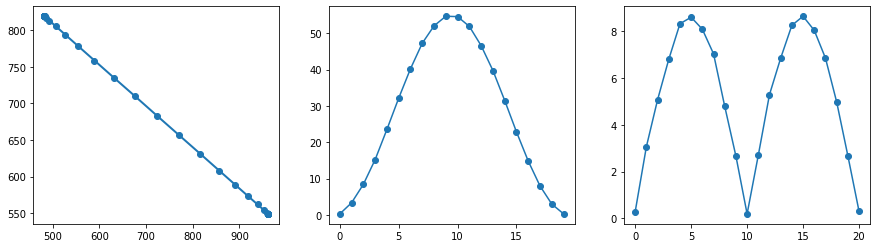

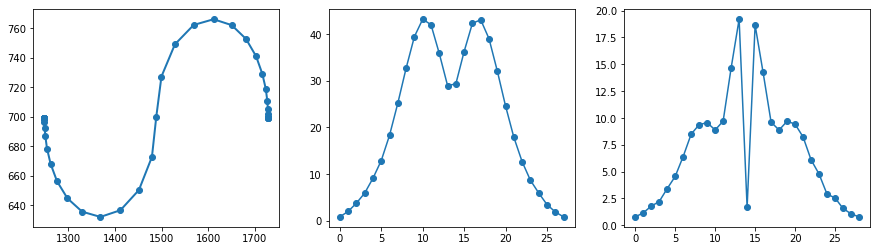

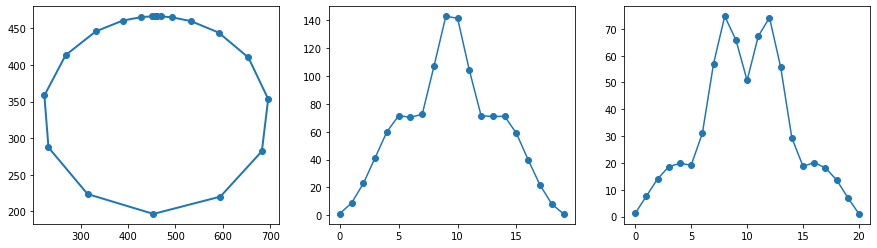

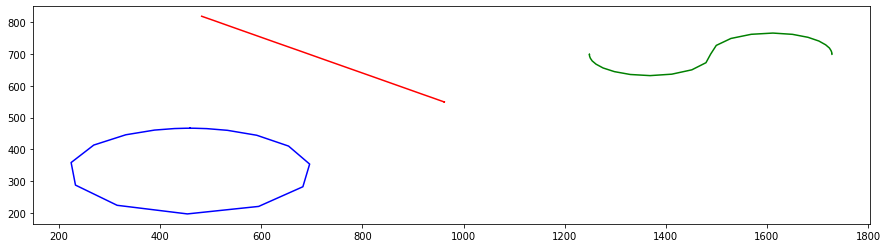

In [15]:
for i in range (0,3):
    
    if i==0:
    #working with distance
        Vel = []
        Acc = []
        nFrames = len(Im[:,1,1,1])
        a = np.zeros(len(Im[1,:,:,1]))
        b = np.zeros(len(Im[1,:,:,1]))
        Dx = np.zeros(len(Im[1,:,:,1]))
        Dy = np.zeros(len(Im[1,:,:,1]))
        D2x = np.zeros(len(Im[1,:,:,1]))
        D2y = np.zeros(len(Im[1,:,:,1]))
        T = 185
        
        for n in range(nFrames):

                    Red = Im[n,10:,:,i]

                    RThresh = (Red >T).astype(np.int8)



                    imlab, Nlab = label(RThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid
                        
                        if area>1000:

                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y


                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)


        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Rx_Pos = np.trim_zeros(a, trim='fb')
        Ry_Pos = np.trim_zeros(b, trim='fb')

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Rx_Pos, Ry_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
    elif i==1:
        Vel = []
        Acc = []
        nFrames = len(Im[:,1,1,1])
        a = np.zeros(len(Im[1,:,:,1]))
        b = np.zeros(len(Im[1,:,:,1]))
        Dx = np.zeros(len(Im[1,:,:,1]))
        Dy = np.zeros(len(Im[1,:,:,1]))
        D2x = np.zeros(len(Im[1,:,:,1]))
        D2y = np.zeros(len(Im[1,:,:,1]))
        T = 185
        for n in range(nFrames):

                    Green = Im[n,10:,:,i]

                    GThresh = (Green >T).astype(np.int8)



                    imlab, Nlab = label(GThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid

                        if area > 1000:
                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y


                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)



        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Gx_Pos = np.trim_zeros(a, trim='fb')
        Gy_Pos = np.trim_zeros(b, trim='fb')

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Gx_Pos, Gy_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
    else:
        Vel = []
        Acc = []
        nFrames = len(Im[:,1,1,1])
        a = np.zeros(len(Im[1,:,:,1]))
        b = np.zeros(len(Im[1,:,:,1]))
        Dx = np.zeros(len(Im[1,:,:,1]))
        Dy = np.zeros(len(Im[1,:,:,1]))
        D2x = np.zeros(len(Im[1,:,:,1]))
        D2y = np.zeros(len(Im[1,:,:,1]))
        T = 184
        for n in range(nFrames):

                    Blue = Im[n,10:,:,i]

                    BThresh = (Blue >T).astype(np.int8)



                    imlab, Nlab = label(BThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid

                        if area > 1000:
                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y

                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)


        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Bx_Pos = np.trim_zeros(a)
        By_Pos = np.trim_zeros(b)

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Bx_Pos, By_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
        
       
    
fig = plt.figure()
line1 = plt.plot(Rx_Pos, Ry_Pos, color='r')
line2 = plt.plot(Gx_Pos, Gy_Pos, color='g')
line3 = plt.plot(Bx_Pos, By_Pos, color='b')

# Phase 5: Marble time - Repeat Phases 1-4 with a new video?

In [37]:
Collide = io.imread(r'C:\Users\trunk\Desktop\Project\Collision.tiff')


(31, 1280, 720, 4)

63


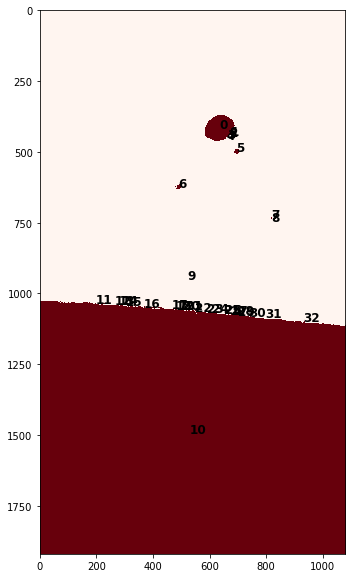

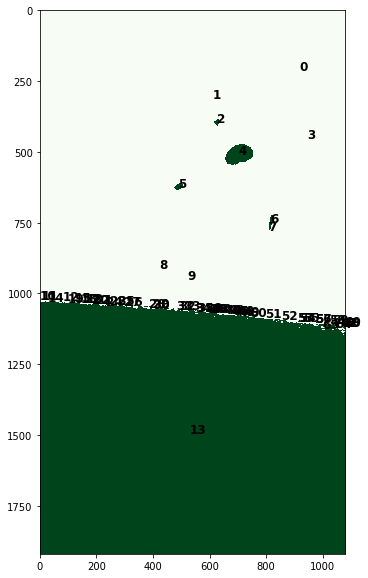

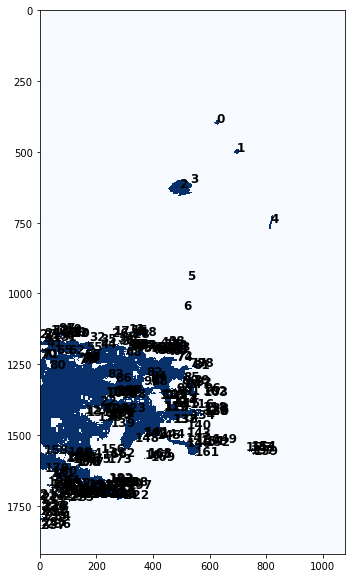

In [42]:
Im.shape
GT=185
RT=185
BT=165
L= len(Collide[:])
print(L)

for i in range (0,3):
    
    if i==0:
        for n in range(19,20):
            fig, ax = plt.subplots(figsize=(15, 10))
            Red = Collide[n,:,:,i]
            #print(Red.shape)
            #plt.imshow(Im[1,:,:,i], cmap='Greens')
            RThresh = (Red >RT).astype(np.int8)
            
        
            #ax.imshow(GThresh, cmap='Greens')
            imlab, Nlab = label(RThresh, 8,0, True)
            #print(imlab)
           
            #print(imlab.shape)
            props = regionprops(imlab)
            #print(props)
            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(RThresh, cmap='Reds')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='k', fontsize='12', weight='bold')
              
        
    elif i==1:
        for n in range(19,20):
            fig, ax = plt.subplots(figsize=(15, 10))
            Green = Collide[n,:,:,i]
            #print(Red.shape)
            plt.imshow(Im[1,:,:,i], cmap='Greens')
            GThresh = (Green >BT).astype(np.int8)
            
        
            #ax.imshow(BThresh, cmap='Greens')
            imlab, Nlab = label(GThresh, 8,0, True)
            #print(imlab)
            #print(imlab.shape)
            props = regionprops(imlab)

            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(GThresh, cmap='Greens')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='k', fontsize='12', weight='bold')        

        
    else:
        for n in range(19,20):
     
            fig, ax = plt.subplots(figsize=(15, 10))
            Blue = Collide[n,:,:,i]
        
            #print(Red.shape)
            plt.imshow(Collision[1,:,:,i], cmap='Reds')
            BThresh = (Blue >RT).astype(np.int8)
            
        
            #ax.imshow(RThresh, cmap='Reds')
            imlab, Nlab = label(BThresh, 8,0, True)
            #print(imlab)
            #print(imlab.shape)
            props = regionprops(imlab)

            for g,p in enumerate(props):
                area = p.area
                y,x=p.centroid
                
                
                ax.imshow(BThresh, cmap='Blues')
                #print('n = ' + str(g) + ',  center = ' +  str(p.centroid) + ',    area = ' + str(p.area))
                plt.text(x,y, str(g), color='k', fontsize='12', weight='bold') 

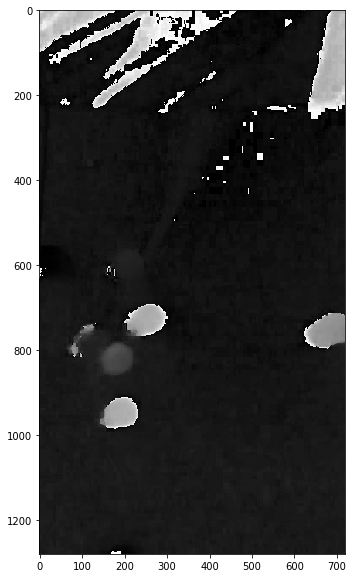

In [48]:
from skimage.color import rgb2hsv
HSV = io.imread(r'C:\Users\trunk\Desktop\Project\Drop.tiff')
for i in range(14,15):
    fig, ax = plt.subplots(figsize=(15, 10))
    rgb_img = HSV[i,:,:,:3]
    hsv_img = rgb2hsv(rgb_img)
    
    hue_img = hsv_img[:,:,0]
    ax.imshow(hue_img, cmap='gray')
    

# Phase 6: Raising standards and focusing on what matters.

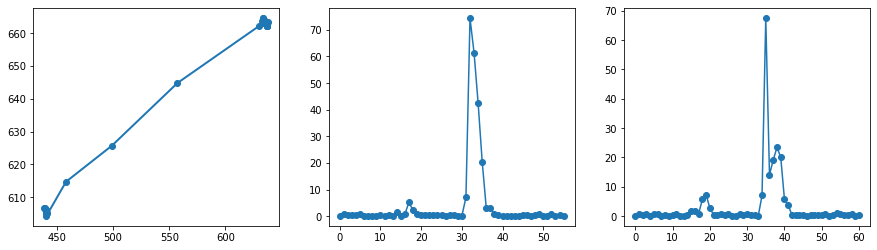

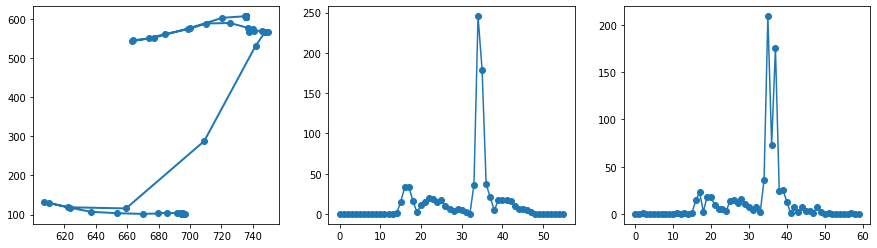

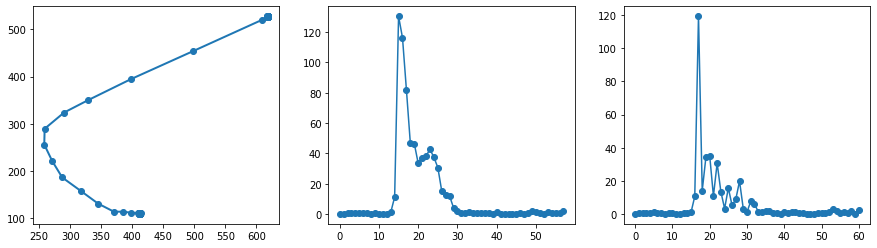

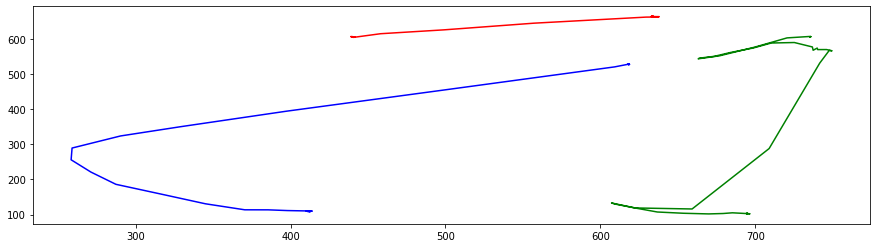

In [38]:
for i in range (0,3):
    
    if i==0:
    #working with distance
        Vel = []
        Acc = []
        nFrames = len(Collision[:,1,1,1])
        a = np.zeros(nFrames)
        b = np.zeros(nFrames)
        Dx = np.zeros(nFrames)
        Dy = np.zeros(nFrames)
        D2x = np.zeros(nFrames)
        D2y = np.zeros(nFrames)
        T = 185
        
        for n in range(nFrames):

                    Red = Collision[n,:,:,i]

                    RThresh = (Red >T).astype(np.int8)



                    imlab, Nlab = label(RThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid
                        
                        if area>1000:

                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y


                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)


        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Rx_Pos = np.trim_zeros(a, trim='fb')
        Ry_Pos = np.trim_zeros(b, trim='fb')

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Rx_Pos, Ry_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
    elif i==1:
        Vel = []
        Acc = []
        nFrames = len(Collision[:,1,1,1])
        a = np.zeros(nFrames)
        b = np.zeros(nFrames)
        Dx = np.zeros(nFrames)
        Dy = np.zeros(nFrames)
        D2x = np.zeros(nFrames)
        D2y = np.zeros(nFrames)
        T = 185
        for n in range(nFrames-1):

                    Green = Collision[n,:,:,i]

                    GThresh = (Green >T).astype(np.int8)



                    imlab, Nlab = label(GThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid

                        if area > 1000:
                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y


                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)



        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Gx_Pos = np.trim_zeros(a, trim='fb')
        Gy_Pos = np.trim_zeros(b, trim='fb')

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Gx_Pos, Gy_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
    else:
        Vel = []
        Acc = []
        nFrames = len(Collision[:,1,1,1])
        a = np.zeros(nFrames)
        b = np.zeros(nFrames)
        Dx = np.zeros(nFrames)
        Dy = np.zeros(nFrames)
        D2x = np.zeros(nFrames)
        D2y = np.zeros(nFrames)
        T = 184
        for n in range(nFrames):

                    Blue = Collision[n,:,:,i]

                    BThresh = (Blue >T).astype(np.int8)



                    imlab, Nlab = label(BThresh, 8,0, True)

                    props = regionprops(imlab)

                    for g,p in enumerate(props):
                        area = p.area
                        y,x=p.centroid

                        if area > 1000:
                            a[n] = x
                            b[n] = len(Im[1,:,1,1])-y

                           # 1st derivative
                            Dx[n] = a[n] - a[n-1] 
                            Dy[n] = b[n] - b[n-1]

                            # 2nd derivative
                            D2x[n] = Dx[n] - Dx[n-1] 
                            D2y[n] = Dy[n] - Dy[n-1]

                            Velocity = math.sqrt(((Dx[n])**2) + ((Dy[n]))**2)
                            Acceleration = math.sqrt(((D2x[n])**2) + ((D2y[n]))**2)
                            if Velocity > .1:
                                Vel.append(Velocity)
                            if Acceleration >.1:
                                Acc.append(Acceleration)


        Skip = [0,1]
        Trim_Vel = np.delete(Vel, 0)
        Trim_Accel = np.delete(Acc, Skip)

        Bx_Pos = np.trim_zeros(a)
        By_Pos = np.trim_zeros(b)

        New_Vel = np.trim_zeros(Trim_Vel, trim='fb')
        New_Accel = np.trim_zeros(Trim_Accel, trim='fb')

        plt.rcParams['figure.figsize']=(15,4) # set the figure size
        fig = plt.figure()
        plt.subplot(131)
        plt.plot(Bx_Pos, By_Pos, linewidth='2', marker='o')
        plt.subplot(132)
        plt.plot(New_Vel, marker='o')
        plt.subplot(133)
        plt.plot(New_Accel, marker='o')
        
       
    
fig = plt.figure()
line1 = plt.plot(Rx_Pos, Ry_Pos, color='r')
line2 = plt.plot(Gx_Pos, Gy_Pos, color='g')
line3 = plt.plot(Bx_Pos, By_Pos, color='b')

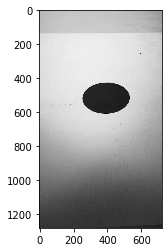

In [52]:
p =plt.imshow(Grey[10,:,:,], cmap='gray')

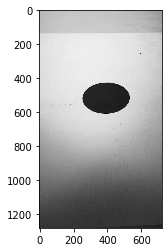

In [49]:
plt.imshow(Grey[10,:,:,], cmap='gray')


[False  True False False False False False False False  True]


[]
